Name  : SILVA G.B.N.M. <br>
Index : 190592X

Q1

In [7]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import circle_fit as cf

In [8]:
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t),(r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))

m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

In [40]:
def circle_ransac(data,error,s):
    threshold = np.std(data)/16
    required_iterations = np.log(1-(1-error))/np.log(1-(1-error)**s)
    max_inliers = 0
    model = None
    print(required_iterations,np.int64(np.ceil(required_iterations)))
    for iterations in range (np.int64(np.ceil(required_iterations))):
        np.random.shuffle(data)
        samples = data[:s]
        x_c,y_c,r,_ = cf.least_squares_circle((samples))
        err = np.abs(r - np.sqrt(np.sum(((x_c,y_c)-data[3:])**2,axis=1)))
        inliers = err <= threshold
        tot_inliers = np.count_nonzero(inliers)
        if tot_inliers >max_inliers :
            max_inliers = tot_inliers
            inlier_points = []
            for ind,inlr in enumerate(inliers):
                if inlr == True :
                    inlier_points.append(data[3:][ind])
            inlier_points = np.array(inlier_points)
            model = (samples,inlier_points)

    xc , yc , radius , _ = cf.least_squares_circle(np.concatenate((model[0],model[1]),axis = 0)) 
    return ((xc,yc),radius,model[0],model[1])  


1.5382162637106231 2


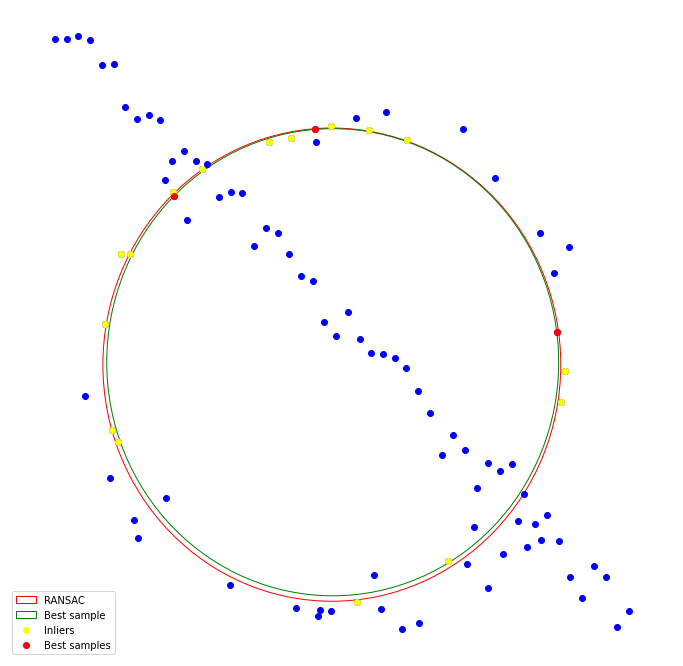

In [43]:
best_model = circle_ransac(X_circ,0.05,3)
xc,yc,r,_ = cf.least_squares_circle(best_model[2])

figure, ax = plt.subplots(figsize=(12, 12))
RASNSAC_circle = plt.Circle(best_model[0], best_model[1], fill=False, color='red', label='RANSAC')        
ax.add_artist(RASNSAC_circle)
circle = plt.Circle((xc, yc), r, fill=False, color='green', label='Best sample')    
ax.add_artist(circle)
ax.scatter(X_circ[:, 0], X_circ[:, 1], c='blue')
ax.scatter(X_line[:, 0], X_line[:, 1], c='blue')
ax.scatter(best_model[3][:, 0], best_model[3][:, 1], c='yellow', label='Inliers')
ax.scatter(best_model[2][:, 0], best_model[2][:, 1], c='red', label='Best samples')
plt.legend(loc=3)
plt.xlim(-14, 14)
plt.axis('off')
plt.savefig(r"images\1.png")
plt.show()

Q2